In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
white = pd.read_csv("data/winequality-white1.csv")
white_2 = pd.read_csv("data/winequality-white1.csv")

In [85]:
conditions = [(white['quality'] <= 4),
              (white['quality'] >= 8)]
choices = ['1 - low', '3 - high']
white['quality class'] = np.select(conditions, choices, default = '2 - middle')
white.head()
white_2['quality_class'] = np.select(conditions, choices, default = 'middle')

# Preprocessing etc.

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
np.correlate(white['residual sugar'], white['quality'])

array([181862.4])

In [15]:
np.corrcoef([white['fixed acidity'], white['volatile acidity'], white['citric acid'], white['residual sugar'], white['quality']])

array([[ 1.        , -0.02269729,  0.2891807 ,  0.0890207 , -0.11366283],
       [-0.02269729,  1.        , -0.14947181,  0.06428606, -0.19472297],
       [ 0.2891807 , -0.14947181,  1.        ,  0.09421162, -0.00920909],
       [ 0.0890207 ,  0.06428606,  0.09421162,  1.        , -0.09757683],
       [-0.11366283, -0.19472297, -0.00920909, -0.09757683,  1.        ]])

In [16]:
white.groupby(['quality']).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


# Plotting

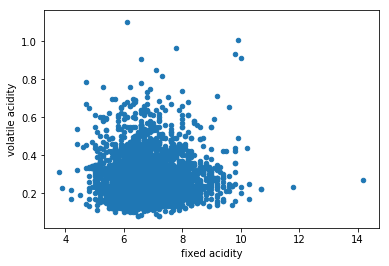

In [25]:
white.plot(kind='scatter', x='fixed acidity', y='volatile acidity')
plt.show()

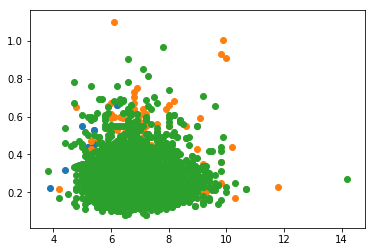

In [26]:
for name, group in white.groupby('quality class'):
    plt.scatter(group['fixed acidity'], group['volatile acidity'], label=name)

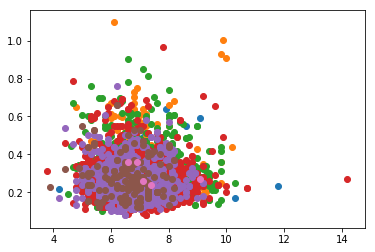

In [27]:
for name, group in white.groupby('quality'):
    plt.scatter(group['fixed acidity'], group['volatile acidity'], label=name)

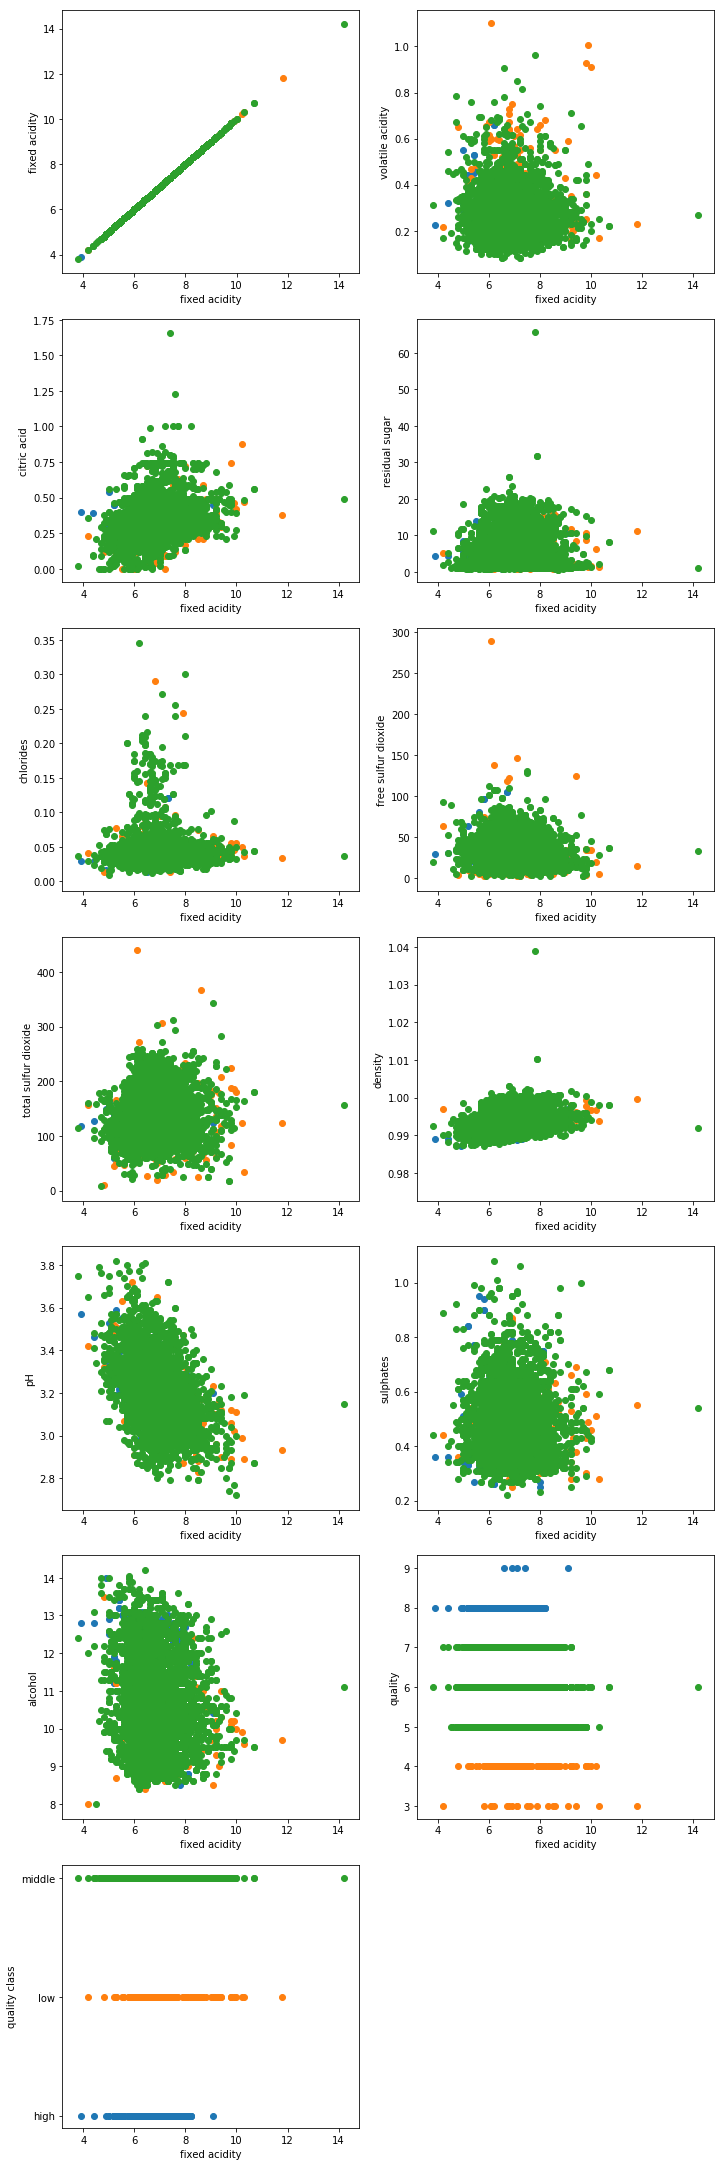

In [35]:
plt.figure(5, (10,30))
i = 1
for column in white:    
    plt.subplot(7,2,i)
    i += 1
    plt.tight_layout()
    plt.xlabel('fixed acidity')
    plt.ylabel(column)
    for name, group in white.groupby('quality class'):
        plt.scatter(group['fixed acidity'], group[column], label=name)
plt.show()

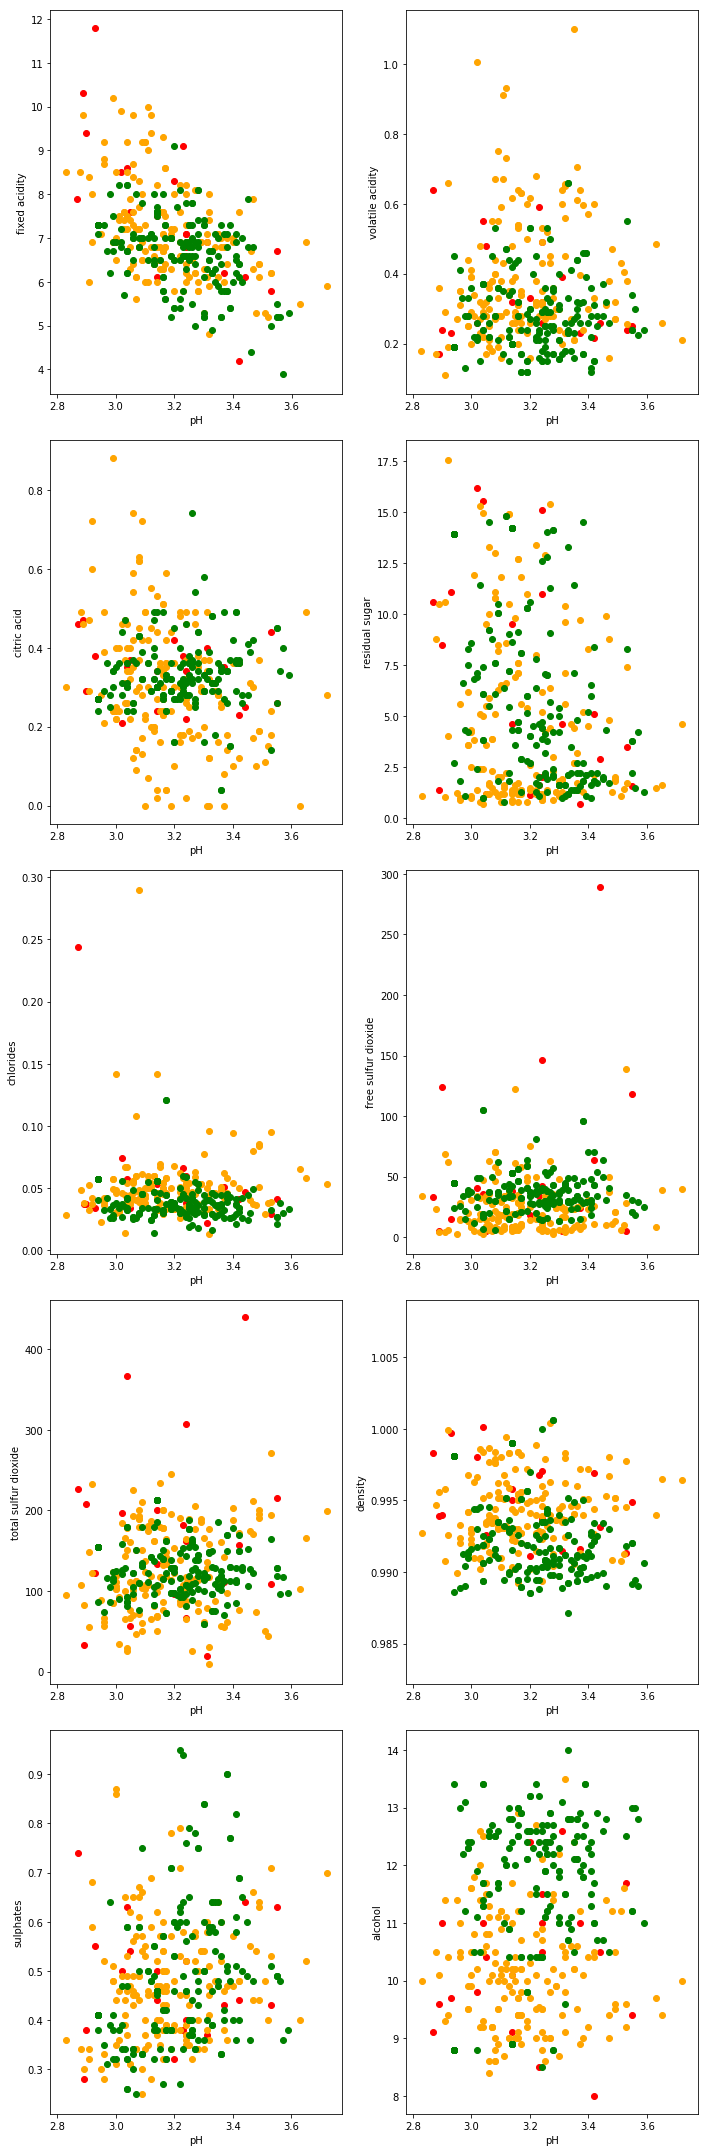

In [32]:
plt.figure(8, (10,30))
i = 1
mainColumn = 'pH'
for column in white:
    if (column != 'quality') & (column != 'quality class') & (column != mainColumn):
        plt.subplot(5,2,i)
        i += 1
        plt.tight_layout()
        plt.xlabel(mainColumn)
        plt.ylabel(column)
        for name, group in white.groupby('quality'):
            if name == 3:
                color = 'red'
            elif name == 4:
                color = 'orange'
            elif name == 5:
                color = 'goldenrod'
            elif name == 6:
                color = 'yellow'
            elif name == 7:
                color = 'yellowgreen'
            else:
                color = 'green'
            if (name not in range(5,8)):
                plt.scatter(group[mainColumn], group[column], c=color, label=name)
plt.show()

In [11]:
import graphviz 
from sklearn.utils.multiclass import unique_labels
from sklearn import tree

#### Binning & Encoding

In [62]:
numBins = 3
standardLabel = ['low', 'middle','high']
white_binned = pd.DataFrame(dict(
    FixedAcidity = pd.cut(white['fixed acidity'], bins=numBins, labels=standardLabel),
    VolatileAcidity = pd.cut(white['volatile acidity'], bins=numBins, labels=standardLabel),
    CitricAcid = pd.cut(white['citric acid'], bins=numBins, labels=standardLabel),
    ResidualSugar = pd.cut(white['residual sugar'], bins=numBins, labels=standardLabel),
    Chlorides = pd.cut(white['chlorides'], bins=numBins, labels=standardLabel),
    FreeSulfurDioxide = pd.cut(white['free sulfur dioxide'], bins=numBins, labels=standardLabel),
    TotalSulfurDioxide = pd.cut(white['total sulfur dioxide'], bins=numBins, labels=standardLabel),
    Density = pd.cut(white['density'], bins=numBins, labels=standardLabel),
    pH = pd.cut(white['pH'], bins=numBins, labels=standardLabel),
    Sulphates = pd.cut(white['sulphates'], bins=numBins, labels=standardLabel),
    Alcohol = pd.cut(white['alcohol'], bins=numBins, labels=standardLabel),
    ))
white_binned_and_encoded = pd.get_dummies(white_binned)

In [63]:
white_binned_and_encoded.head()

,FixedAcidity_low,FixedAcidity_middle,FixedAcidity_high,VolatileAcidity_low,VolatileAcidity_middle,VolatileAcidity_high,CitricAcid_low,CitricAcid_middle,CitricAcid_high,ResidualSugar_low,...,Density_high,pH_low,pH_middle,pH_high,Sulphates_low,Sulphates_middle,Sulphates_high,Alcohol_low,Alcohol_middle,Alcohol_high
0,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


### Decision Tree

In [45]:
white_data = white.drop(['quality', 'quality class'], axis = 1)
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [46]:
decision_tree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree.fit(white_data, white['quality class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
dot_data = tree.export_graphviz(decision_tree,
                         feature_names=white_data.columns.values,
                         class_names=unique_labels(white['quality class']),  
                         filled=True, rounded=True,special_characters=True,out_file=None)
#graphviz.Source(dot_data)

In [48]:
white_middle = white_2[white_2['quality_class'] == 'middle']

In [49]:
white_middle.groupby('quality_class').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality_class,,,,,,,,,,,,
middle,6.848633,0.274308,0.335499,6.485072,0.045887,35.605733,139.183903,0.994087,3.187158,0.490573,10.482895,5.872767


In [50]:
white_middle = white_middle.drop(['quality_class'], axis = 1)

In [51]:
conditions = [(white_middle['quality'] <= 5),
              (white_middle['quality'] >= 7)]
choices = ['1 - low', '3 - high']
white_middle['quality_class'] = np.select(conditions, choices, default = '2 - middle')
white_middle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle


In [52]:
white_data_middle = white_middle.drop(['quality', 'quality_class'], axis = 1)
#white_data_middle.drop(['quality', 'quality_class'], axis = 1)
white_middle.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2 - middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2 - middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2 - middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2 - middle


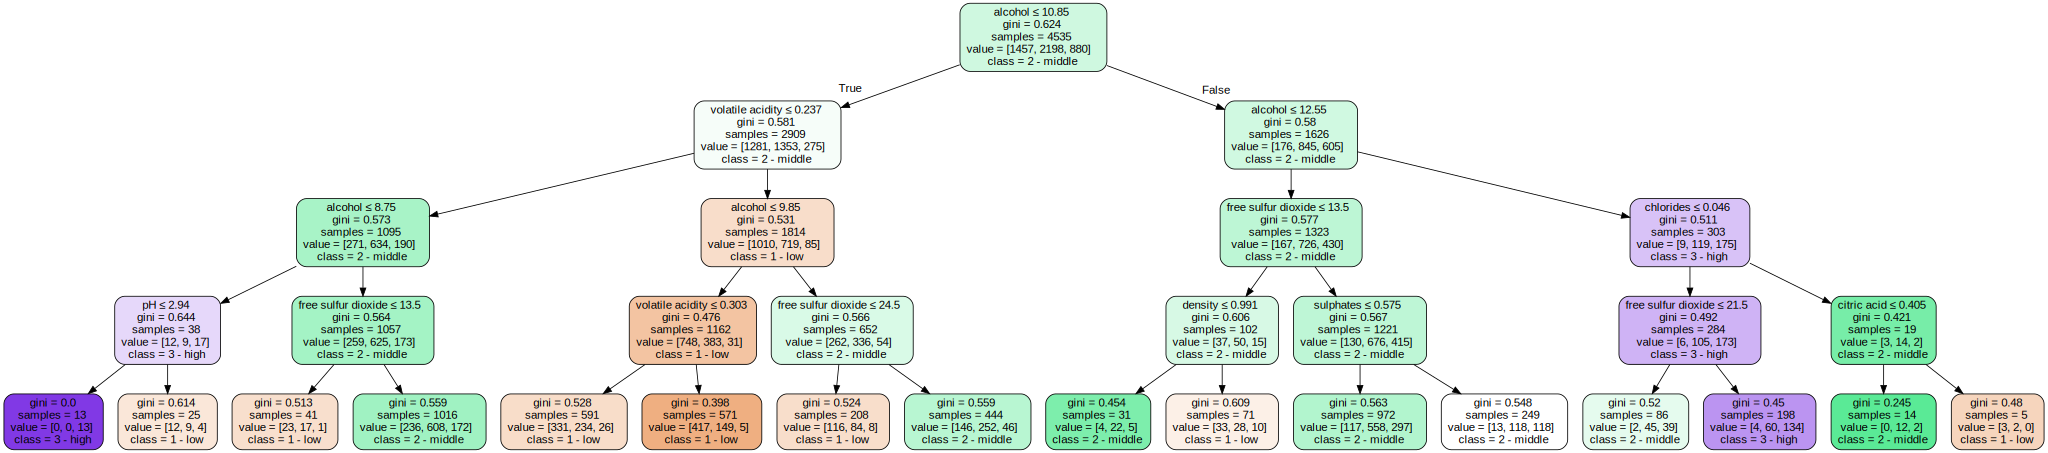

In [53]:
decision_tree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=10)
decision_tree.fit(white_data_middle, white_middle['quality_class'])
dot_data = tree.export_graphviz(decision_tree,
                         feature_names=white_data_middle.columns.values,
                         class_names=unique_labels(white_middle['quality_class']),  
                         filled=True, rounded=True,special_characters=True,out_file=None)
graphviz.Source(dot_data)

In [55]:
### Dieser Decision Tree sieht überaus Kacke aus... Testen muss ich das Model nicht mal mehr, da
### es komplett kacke ist, selbst für die Train Daten, weiß auch jetzt wieso

### Support Vector Machines

In [113]:
import sklearn as sk
from sklearn import svm

In [158]:
clf = svm.SVC(gamma=0.01, decision_function_shape='ovo')
              #class_weight={'1 - low':50, '3 - high':50})

In [159]:
white_target = white['quality']
data_train, data_test, target_train, target_test = train_test_split(
    white_data, white_target,test_size=0.2, random_state=42, stratify=white_target)

In [160]:
clf.fit(data_train, target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
predictions = clf.predict(data_test)

In [162]:
print(accuracy_score(target_test, predictions))
print(confusion_matrix_report(target_test, predictions))
print(classification_report(target_test, predictions))

0.49489795918367346
      ____________Prediction_____________
         3     4     5     6     7     8     9
    3    0     0     0     4     0     0     0
    4    0     1    21    11     0     0     0
    5    0     0   131   155     5     0     0
    6    0     0    88   340    12     0     0
    7    0     0    26   137    13     0     0
    8    0     0     6    28     1     0     0
    9    0     0     0     1     0     0     0

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       1.00      0.03      0.06        33
          5       0.48      0.45      0.47       291
          6       0.50      0.77      0.61       440
          7       0.42      0.07      0.13       176
          8       0.00      0.00      0.00        35
          9       0.00      0.00      0.00         1

avg / total       0.48      0.49      0.44       980



C:\Users\demar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
### Have I by this also already automatically done Support Vector Regression
### or do I need to specify this explicitly (well I think so, as I also
### have not yet done this for quality instead of quality classes)

### Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def confusion_matrix_report(y_true, y_pred):    
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

In [87]:
white_target = white['quality class']
data_train, data_test, target_train, target_test = train_test_split(
    white_data, white_target,test_size=0.2, random_state=42, stratify=white_target)

In [88]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [89]:
white_target.head()

0    2 - middle
1    2 - middle
2    2 - middle
3    2 - middle
4    2 - middle
Name: quality class, dtype: object

#### Using Train Test Split

In [90]:
naive_bayes = GaussianNB()
naive_bayes.fit(data_train, target_train)

GaussianNB(priors=None)

In [91]:
predictions = naive_bayes.predict(data_test)

In [93]:
print(confusion_matrix_report(target_test, predictions))
print(accuracy_score(target_test, predictions))
print(classification_report(target_test, predictions))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low         7         28          2
2 - middle        21        851         35
  3 - high         0         27          9

0.8846938775510204
             precision    recall  f1-score   support

    1 - low       0.25      0.19      0.22        37
 2 - middle       0.94      0.94      0.94       907
   3 - high       0.20      0.25      0.22        36

avg / total       0.89      0.88      0.89       980



#### Using Cross Validation

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

In [98]:
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
predicted = cross_val_predict(naive_bayes, white_data, white['quality class'], cv=10)

In [99]:
print(confusion_matrix_report(white['quality class'], predicted))
print(accuracy_score(white['quality class'], predicted))
print(classification_report(white['quality class'], predicted))

           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        51        131          1
2 - middle       162       4145        228
  3 - high         4        146         30

0.8628011433238056
             precision    recall  f1-score   support

    1 - low       0.24      0.28      0.26       183
 2 - middle       0.94      0.91      0.93      4535
   3 - high       0.12      0.17      0.14       180

avg / total       0.88      0.86      0.87      4898



In [101]:
### Using just simple gaussian naive bayes we do not receive a satisfying
### result. Unbalanced classes lead to unacceptable results for low
### and high quality white wines

In [102]:
import numpy as np

In [103]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

all_test_target = []
all_test_predition = []
for train_indices, test_indices in cv.split(white_data.values, white['quality class']):
    
    train_indices = np.append(train_indices, (white['quality class']!='2 - middle').nonzero()[0])
    
    train_data = white_data.values[train_indices]
    train_target = white_target[train_indices]
    
    naive_bayes.fit(train_data, train_target)

    test_data = white_data.values[test_indices]
    test_target = white_target[test_indices]
    all_test_target.extend(test_target)
    
    test_prediction = naive_bayes.predict(test_data)
    all_test_predition.extend(test_prediction)
    
print("Gaussian Naive Bayes with accuracy of {}".format(accuracy_score(all_test_target, all_test_predition)))
print(confusion_matrix_report(all_test_target, all_test_predition))
print(classification_report(all_test_target, all_test_predition))

Gaussian Naive Bayes with accuracy of 0.8133932217231523
           __________Prediction__________
             1 - low 2 - middle   3 - high
   1 - low        60        117          6
2 - middle       199       3861        475
  3 - high         2        115         63

             precision    recall  f1-score   support

    1 - low       0.23      0.33      0.27       183
 2 - middle       0.94      0.85      0.89      4535
   3 - high       0.12      0.35      0.17       180

avg / total       0.89      0.81      0.85      4898



In [104]:
### Recall improves slightly for low and doubles for high, meaning
### that this is a way that we can improve the outcome. Nevertheless
### performance remains at an unacceptable level